In [44]:
import pathlib
import pandas as pd
import plotnine as gg

In [45]:
output_dir = pathlib.Path("figures")

cell_health_dir = pathlib.Path("../../1.calculate-metrics/cell-health/results")
grit_file = pathlib.Path(f"{cell_health_dir}/cell_health_grit.tsv")
compartment_grit_file = pathlib.Path(f"{cell_health_dir}/cell_health_grit_compartments.tsv.gz")

In [47]:
grit_results = (
    pd.read_csv(grit_file, sep="\t")
    .assign(compartment="all", feature_group="all")
    .query("barcode_control == 'cutting_control'")
)

grit_results = grit_results.assign(num_features=grit_results.shape[0])

compartment_grit_results = pd.read_csv(compartment_grit_file, sep="\t")

In [49]:
grit_results = (
    pd.concat(
        [
            grit_results,
            compartment_grit_results
        ],
        axis="rows"
    )
    .dropna()
    .reset_index(drop=True)
)

print(grit_results.shape)
grit_results.head()

(18306, 10)


,perturbation,group,grit,cell_line,barcode_control,cor_method,compartment,feature_group,num_features,channel
0,AKT1-1,AKT1,0.687706,HCC44,cutting_control,pearson,Cells,all,100,all
1,AKT1-2,AKT1,0.666448,HCC44,cutting_control,pearson,Cells,all,100,all
2,ARID1B-1,ARID1B,0.465970,HCC44,cutting_control,pearson,Cells,all,100,all
3,ARID1B-2,ARID1B,0.322900,HCC44,cutting_control,pearson,Cells,all,100,all
4,ATF4-1,ATF4,0.186567,HCC44,cutting_control,pearson,Cells,all,100,all


/Users/gway/miniconda3/envs/grit-benchmark/lib/python3.9/site-packages/plotnine/facets/facet.py:549: PlotnineWarning: If you need more space for the x-axis tick text use ... + theme(subplots_adjust={'wspace': 0.25}). Choose an appropriate value for 'wspace'.


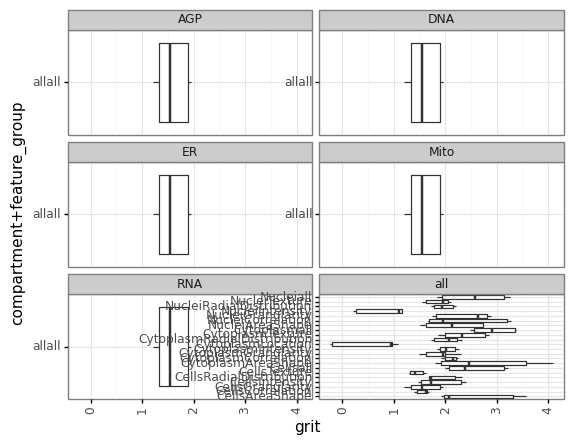

<ggplot: (407866365)>

In [52]:
(
    gg.ggplot(grit_results.query("group == 'ITGAV'"), gg.aes(x="compartment+feature_group", y="grit"))
    + gg.geom_boxplot()
    + gg.facet_wrap("~channel", nrow=4, scales="free_y")
    + gg.theme_bw()
    + gg.theme(axis_text_x=gg.element_text(angle=90))
    + gg.coord_flip()
)

/Users/gway/miniconda3/envs/grit-benchmark/lib/python3.9/site-packages/plotnine/layer.py:372: PlotnineWarning: stat_boxplot : Removed 468 rows containing non-finite values.


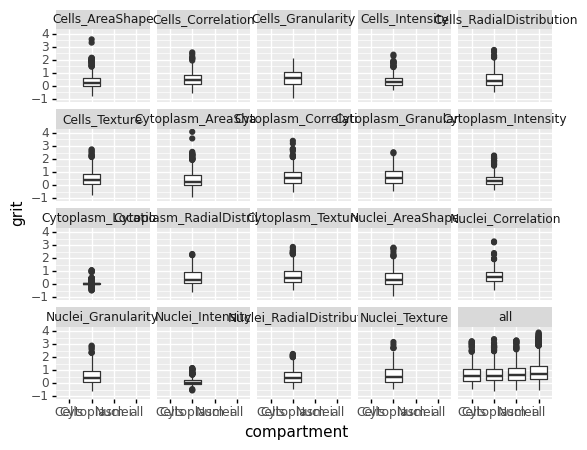

<ggplot: (407373821)>

In [16]:
(
    gg.ggplot(grit_results, gg.aes(x="compartment", y="grit"))
    + gg.geom_boxplot()
    + gg.facet_wrap("~feature_group")
)